# BrainFlow to MNE Python Notebook

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import brainflow
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds

from mne.viz.topomap import _prepare_topo_plot, plot_topomap
import mne
from mne.channels import read_layout

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# use synthetic board for demo
params = BrainFlowInputParams ()
board = BoardShim (BoardIds.SYNTHETIC_BOARD.value, params)
board.prepare_session ()
board.start_stream ()
time.sleep (10)
data = board.get_board_data ()
board.stop_stream ()
board.release_session ()

In [3]:
eeg_channels = BoardShim.get_eeg_channels (BoardIds.SYNTHETIC_BOARD.value)
eeg_data = data[eeg_channels, :]

Creating RawArray with float64 data, n_channels=8, n_times=2132


    Range : 0 ... 2131 =      0.000 ...     8.324 secs


Ready.


Effective window size : 8.000 (s)


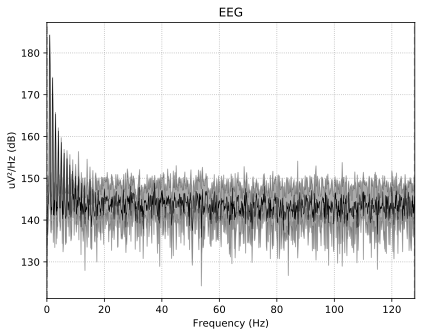

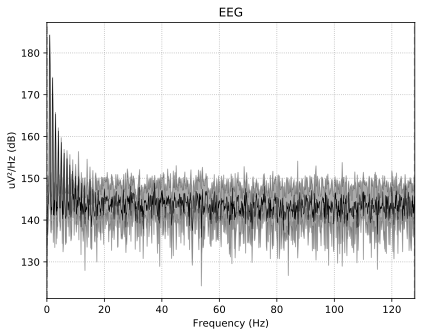

In [4]:
# Creating MNE objects from brainflow data arrays
ch_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
ch_names = ['T7', 'CP5', 'FC5', 'C3', 'C4', 'FC6', 'CP6', 'T8']
sfreq = BoardShim.get_sampling_rate (BoardIds.SYNTHETIC_BOARD.value)
info = mne.create_info (ch_names = ch_names, sfreq = sfreq, ch_types = ch_types)
raw = mne.io.RawArray (eeg_data, info)
# its time to plot something!
raw.plot_psd (average = True)